# Project 5DEEP (Deep Learning) 
### Hugo Huygens - Matteo Gora

## Sujet: 

Vous devez télécharger et utiliser les jeux de données suivant : train et test (source : Kaggle).

Les données sont des images représentant les lettres de l'alphabet en langue des signes. Les classes indexées de 0 à 25 représentent les lettres de A à Z. À noter qu'il n'y a pas de données pour les lettres J et Z (car on ne les représente pas par des signes statiques mais par des mouvements).

Vous devrez développer "from scratch" vos propres réseaux de neurones pour résoudre ce problème de classification. Utiliser un modèle pré-entrainé n'est autorisé que dans la question correspondante.

Votre rendu se fera sous la forme d'un archive au format .zip contenant un notebook Jupyter (code source), son export au format PDF (ou HTML) ainsi qu'une sauvegarde de votre modèle final. Tout projet ne comportant pas ces trois éléments sera ajourné sans contestation possible.

Toutes les étapes de votre projet devront être commentées et justifiées. Tous les résultats devront être interprétés. La qualité de la rédaction (style, grammaire et orthographe) sera prise en compte. Un rendu professionnel est attendu.

L'usage de Python et de la librairie Tensorflow est obligatoire.

Charger les données et les transformer en images de 28 x 28 pixels.

Ce dataset est-il équilibré ? Est-il nécessaire de rééquilibrer les données ? Le faire si besoin est.

Construire un réseau de neurones convolutif pour résoudre ce problème de classification. Il devra contenir au minimum les éléments suivants : couches de convolution, couche de "pooling", "dropout", couches cachées complètement connectées. Vous êtes libres d'ajouter d'autres éléments.

Entraîner le modèle construit à la question précédente et mesurer sa performance.

Faire une recherche de meilleurs hyperparamètres avec la fonction "GridSearchCV“.

Utiliser une technique d'augmentation d'images. Les résultats de vos modèles s'en trouvent-ils améliorés ? Était-ce prévisible ?

Sauvegarder votre meilleur modèle.

Utiliser votre meilleur modèle avec des photos prises pour l'occasion où vous représenterez différents signes.

Choisir un des modèles pré-entrainés disponible avec Keras. Le charger et le personnaliser avec des couches de convolution et complètement connectées. L'entraîner et mesurer sa performance. La comparer avec celles de votre meilleur modèle.

### Importation des librairies

In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


### Importation des datasets

In [62]:
train_data = pd.read_csv('./datasets/sign_mnist_train.csv')
test_data = pd.read_csv('./datasets/sign_mnist_test.csv')

### Transformation des images en 28 x 28 pixels.

Ici on affiche un échantillon de 25 images car plus pourrait être beaucoup trop lourd 

### Séparation des labels et des caractéristiques
Ici, nous séparons les données en deux ensembles : les caractéristiques (les pixels des images) et les labels (les classes cibles).
Le label correspond à la lettre de l'alphabet en langue des signes, et chaque image est représentée par 784 pixels (28x28).
Nous utilisons la méthode drop() pour enlever la colonne 'label' des données d'entraînement et de test, 
car cette colonne ne contient pas de pixels mais les classes cibles.

In [63]:
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

### Normalisation des données (les valeurs de pixels entre 0 et 1)
Les images sont codées en niveaux de gris avec des valeurs de pixels allant de 0 à 255.
Pour faciliter l'apprentissage des modèles de machine learning et améliorer la convergence du modèle,
il est courant de normaliser les données afin que les valeurs de pixels soient comprises entre 0 et 1.
Cela se fait en divisant chaque valeur de pixel par 255.

In [64]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Reshape des données en images 28x28 pixels
Après la normalisation, nous redimensionnons les données pour qu'elles correspondent à leur véritable forme d'image 28x28.
Chaque image est initialement une longue série de 784 pixels (28x28), nous utilisons donc la méthode reshape() 
pour structurer ces pixels sous forme de matrices 2D représentant les images.
Le dernier paramètre "1" représente le nombre de canaux, ici il s'agit d'images en niveaux de gris, donc un seul canal.

In [65]:
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

### Affichage des dimensions des jeux de données
Nous affichons ici la forme des données d'entraînement et de test pour nous assurer que tout a été correctement chargé et redimensionné.

In [66]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (27455, 28, 28)
Test data shape: (7172, 28, 28)


### Fonction pour afficher un lot d'images
Cette fonction affiche un ensemble d'images (défini par batch_size) avec leurs labels respectifs.
Nous utilisons la bibliothèque matplotlib pour visualiser les images.
La fonction parcourt chaque image dans un lot et les affiche dans une grille (5x5 pour 25 images par défaut).

In [67]:
def display_images(data, labels, batch_size=25, start_index=0):
    plt.figure(figsize=(10, 10))
    for i in range(batch_size):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(data[start_index + i], cmap='gray')
        plt.title(f"Label: {labels[start_index + i]}")
    plt.show()

### Affichage du premier lot d'images
Nous appelons la fonction display_images pour afficher les premières 25 images du jeu de données d'entraînement
Cela permet de visualiser les exemples d'images et de vérifier que les données ont été correctement chargées et formatées.
Charger plus d'images pourrait alourdir l'exécution du programme et provoquer des ralentissements

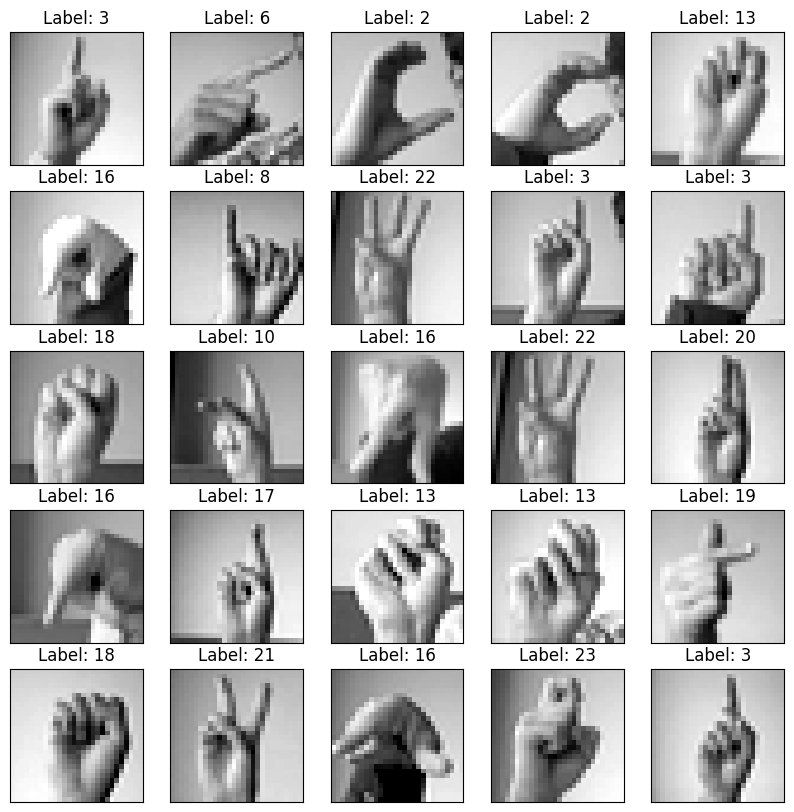

In [68]:
display_images(X_train, y_train, batch_size=25, start_index=0)